In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/sedroc/Bachelor/FEPCEU')

In [3]:
from enhanced_experiment import EnhancedTimeSeriesExperiment
from models.arima import Arima
from models.baseline import Baseline
from models.lgbm import LGBM
from models.neuralproph import Neuralprophet
from models.timegpt import TimeGPT

from data.data_retriever import Dataretreiver

/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
# Define models
models = {
    'BASELINE': Baseline(),
    'LGBM': LGBM(),
    'ARIMA': Arima(order=[1,0,1], seasonal_order=[1,1,1,24]),
    'NEURALPROPHET': Neuralprophet(),
    'TimeGPT' : TimeGPT()
}

# Initialize the experiment
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=3,
    step_size=192 # 8 days are skipped between each forecast.
)
# Define custom combinations of different measurement types with different areas
custom_combinations = [
    {
        'wind': {2,7,8,23,28,29,13,32,37,26,36,13,3},
        'sun': {13,14,18,19,17,22,26,27,32,33,12,28,16}
    },
]

# Experiment 1
No reduction, with custom areas. Additionally, models are trained with no exogenous variables

In [ ]:
data = Dataretreiver(reduce=None, debug=True)
df = data.combined

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    custom_feature_combinations=custom_combinations,
    add_all_columns=True,
    add_base_columns=True,
)

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Identified area columns: {'sun': {1: 'sun_area_1', 10: 'sun_area_10', 11: 'sun_area_11', 12: 'sun_area_12', 13: 'sun_area_13', 14: 'sun_area_14', 15: 'sun_area_15', 16: 'sun_area_16', 17: 'sun_area_17', 18: 'sun_area_18', 19: 'sun_area_19', 2: 'sun_area_2', 20: 'sun_area_20', 21: 'sun_area_21', 22: 'sun_area_22', 23: 'sun_area_23', 24: 'sun_area_24', 25: 'sun_area_25', 26: 'sun_area_26', 27: 'sun_area_27', 28: 'sun_area_28', 29: 'sun_area_29', 3: 'sun_area_3', 30: 'sun_area_30', 31: 'sun_area_31', 32: 'sun_area_32', 33: 'sun_area_33', 34: 'sun_area_34', 35: 'sun_area_35', 36: 'sun_area_36', 37: 'sun_area_37', 38: 'sun_area_38', 39: 'sun_area_39', 4: 'sun_area_4', 40: 'sun_area_40', 5: 'sun_area_5', 6: 'sun_area_6', 7: 'sun_area_7', 8: 'sun_area_8', 9: 'sun_area_

Best trial: 18. Best value: 187.146: 100%|██████████| 20/20 [02:07<00:00,  6.39s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_data_in_leaf': 70, 'learning_rate': 0.022474408710481952, 'feature_fraction': 0.5235947595970014, 'max_bin': 82, 'reg_alpha': 0.028201780323397346, 'reg_lambda': 0.503153547975238}
  Backtesting metric: 187.14605107016908
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]
Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:08<00:00, 29.74it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 2/3 for feature group base_only


Best trial: 3. Best value: 203.177: 100%|██████████| 20/20 [02:04<00:00,  6.21s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.36828461979295724, 'feature_fraction': 0.6497975335887826, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387411}
  Backtesting metric: 203.17737463971764
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                    NEURALPROPHET
base_only      205.9427 ± 67.4183
custom_area_0  221.8133 ± 49.5130
all_areas      233.7904 ± 34.4393
                    NEURALPROPHET
base_only        93.9160 ± 5.8736
custom_area_0  122.5044 ± 22.4471
all_areas      217.8542 ± 20.2137


In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/experiment_1_results.csv")

# Experiment 2
PCA pure reduction. No custom areas

In [5]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [6]:
data = Dataretreiver(reduce='pca_pure', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pca_pure_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top columns selected: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31']
Total variance explained with the 10 columns: 98.45%
Top columns selected: ['wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11']
Total variance explained with the 10 columns: 97.53%
Top columns selected: ['temp_area_15', 'temp_area_25', 'temp_area_20', 'temp_area_5', 'temp_area_36', 'temp_area_4', 'temp_area_14', 'temp_area_10', 'temp_area_40', 'temp_area_11', 'temp_area_24', 'temp_area_19', 'temp_area_9'

Best trial: 6. Best value: 200.184: 100%|██████████| 20/20 [01:26<00:00,  4.32s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.2905039091708218, 'feature_fraction': 0.5478562583061936, 'max_bin': 227, 'reg_alpha': 0.6272489720512687, 'reg_lambda': 0.7234163581899548}
  Backtesting metric: 200.1838643326432
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 56.38it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31', 'wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 2/5 for feature group all_areas


Best trial: 3. Best value: 203.177: 100%|██████████| 20/20 [01:24<00:00,  4.23s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.36828461979295724, 'feature_fraction': 0.6497975335887826, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387411}
  Backtesting metric: 203.17737463971764
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 52.92it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  8.80it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31', 'wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 3/5 for feature group all_areas


Best trial: 11. Best value: 196.951: 100%|██████████| 20/20 [01:20<00:00,  4.05s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 800, 'max_depth': 3, 'min_data_in_leaf': 71, 'learning_rate': 0.32631417602951285, 'feature_fraction': 0.9914051578268094, 'max_bin': 250, 'reg_alpha': 0.9756497942847593, 'reg_lambda': 0.3311404017818647}
  Backtesting metric: 196.95058383434045
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 53.13it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31', 'wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 4/5 for feature group all_areas


Best trial: 6. Best value: 194.951: 100%|██████████| 20/20 [01:20<00:00,  4.03s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.2905039091708218, 'feature_fraction': 0.5478562583061936, 'max_bin': 227, 'reg_alpha': 0.6272489720512687, 'reg_lambda': 0.7234163581899548}
  Backtesting metric: 194.95079587820308
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 48.68it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  9.52it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31', 'wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 5/5 for feature group all_areas


Best trial: 14. Best value: 188.3: 100%|██████████| 20/20 [01:22<00:00,  4.12s/it]  


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 32, 'learning_rate': 0.3858533805337025, 'feature_fraction': 0.6564540780078123, 'max_bin': 125, 'reg_alpha': 0.7953977941366382, 'reg_lambda': 0.006655910930185804}
  Backtesting metric: 188.300202479436
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

  warnings.warn("Maximum Likelihood optimization failed to "



Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 53.08it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_21', 'sun_area_6', 'sun_area_5', 'sun_area_17', 'sun_area_40', 'sun_area_11', 'sun_area_2', 'sun_area_36', 'sun_area_18', 'sun_area_4', 'sun_area_1', 'sun_area_19', 'sun_area_31', 'wind_area_5', 'wind_area_1', 'wind_area_36', 'wind_area_40', 'wind_area_30', 'wind_area_2', 'wind_area_15', 'wind_area_16', 'wind_area_10', 'wind_area_29', 'wind_area_4', 'wind_area_38', 'wind_area_11', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [7]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                     BASELINE                LGBM               ARIMA  \
all_areas  200.2838 ± 61.1400  159.1760 ± 25.1511  162.3220 ± 35.6349   

                NEURALPROPHET              TimeGPT  
all_areas  244.1810 ± 67.9805  339.7902 ± 151.9247  
                     BASELINE                LGBM               ARIMA  \
all_areas  262.0008 ± 83.8358  205.0885 ± 39.1087  204.4106 ± 40.8489   

                NEURALPROPHET              TimeGPT  
all_areas  297.0044 ± 79.5193  409.2508 ± 143.5163  
                  BASELINE              LGBM               ARIMA  \
all_areas  0.0306 ± 0.0045  85.6244 ± 2.4454  553.2826 ± 13.0885   

               NEURALPROPHET           TimeGPT  
all_areas  114.1423 ± 7.2315  13.0170 ± 4.8486  


In [8]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pca_pure_results.csv")

Saved feature group results to ../results/reduction_fr/pca_pure_results_20250516_115926.csv


# Experiment 3
PCA KMeans reduction. No custom areas

In [9]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:163: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:164: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/da

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:209: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



'H' is deprecated and will be removed in a future version, please use 'h' instead.




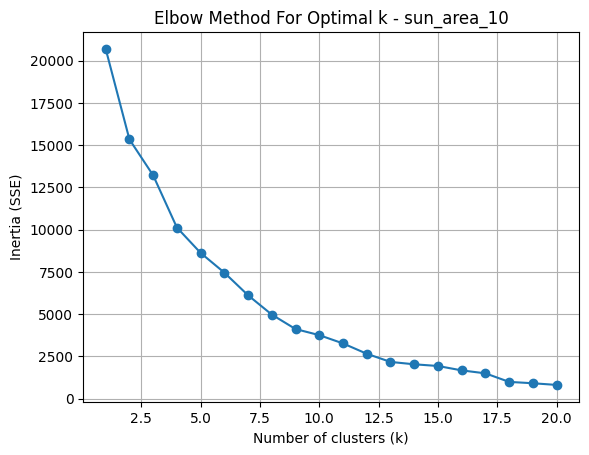

PCA explained variance ratio: 80.12% total variance retained

Selected representative wind points:
['sun_area_23', 'sun_area_8', 'sun_area_34', 'sun_area_10', 'sun_area_21', 'sun_area_37', 'sun_area_25', 'sun_area_31', 'sun_area_6', 'sun_area_4', 'sun_area_2', 'sun_area_35', 'sun_area_17']


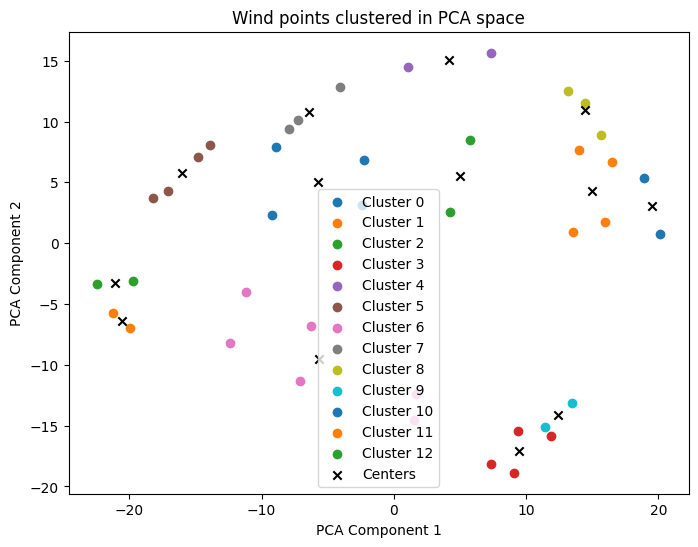

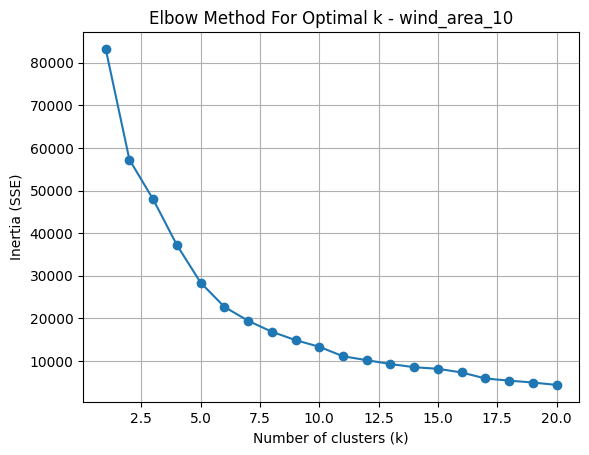

PCA explained variance ratio: 91.53% total variance retained

Selected representative wind points:
['wind_area_22', 'wind_area_35', 'wind_area_12', 'wind_area_9', 'wind_area_16', 'wind_area_31', 'wind_area_19', 'wind_area_32', 'wind_area_1', 'wind_area_3', 'wind_area_25', 'wind_area_10', 'wind_area_24']


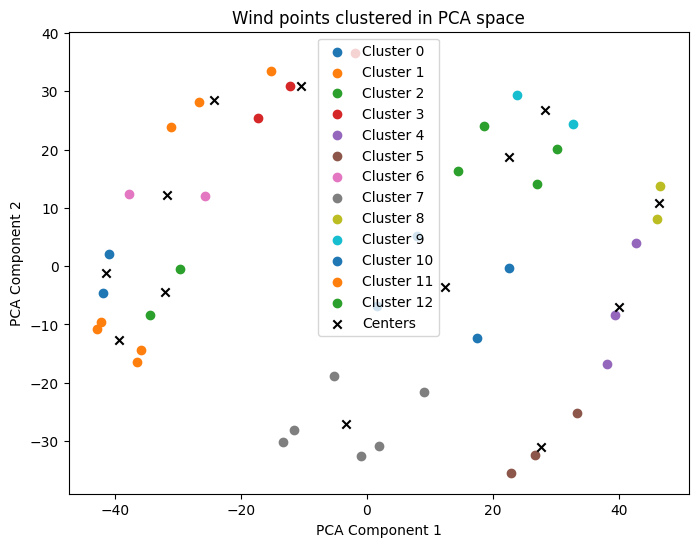

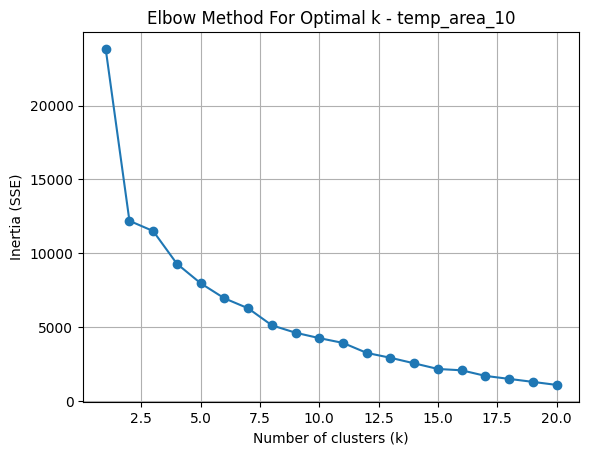

PCA explained variance ratio: 90.24% total variance retained

Selected representative wind points:
['temp_area_17', 'temp_area_8', 'temp_area_40', 'temp_area_26', 'temp_area_19', 'temp_area_29', 'temp_area_20', 'temp_area_37', 'temp_area_10', 'temp_area_6', 'temp_area_13', 'temp_area_25', 'temp_area_3']


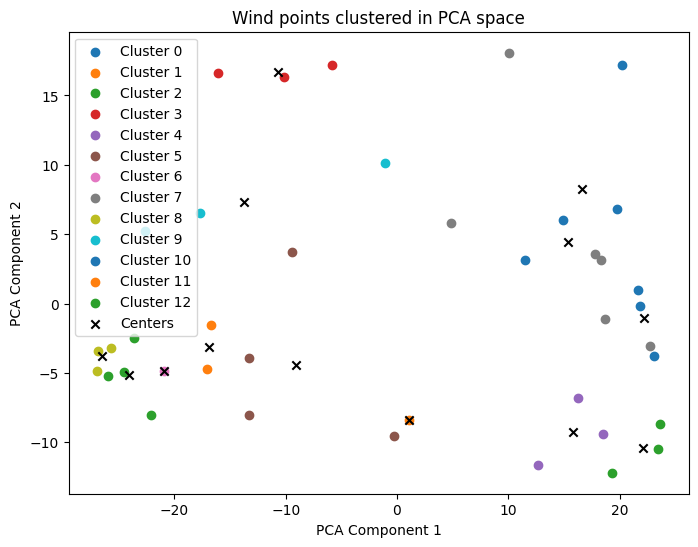

Saved selected area columns to ../results/reduction_fr/pca_kmeans_areas_pca_kmeans_20250516_115930.csv
Identified area columns: {'sun': {23: 'sun_area_23', 8: 'sun_area_8', 34: 'sun_area_34', 10: 'sun_area_10', 21: 'sun_area_21', 37: 'sun_area_37', 25: 'sun_area_25', 31: 'sun_area_31', 6: 'sun_area_6', 4: 'sun_area_4', 2: 'sun_area_2', 35: 'sun_area_35', 17: 'sun_area_17'}, 'wind': {22: 'wind_area_22', 35: 'wind_area_35', 12: 'wind_area_12', 9: 'wind_area_9', 16: 'wind_area_16', 31: 'wind_area_31', 19: 'wind_area_19', 32: 'wind_area_32', 1: 'wind_area_1', 3: 'wind_area_3', 25: 'wind_area_25', 10: 'wind_area_10', 24: 'wind_area_24'}}
Cross-validation splits with sliding window:
Split 1: Train start = 2024-01-01 00:00:00 (index 0), Train end = 2024-06-29 20:00:00 (index 4340), Test end = 2024-07-07 19:00:00 (index 4531), Training size = 4340
Split 2: Train start = 2024-01-09 00:00:00 (index 192), Train end = 2024-07-07 20:00:00 (index 4532), Test end = 2024-07-15 19:00:00 (index 4723), T

Best trial: 18. Best value: 199.802: 100%|██████████| 20/20 [01:14<00:00,  3.74s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 8, 'min_data_in_leaf': 28, 'learning_rate': 0.130475871043031, 'feature_fraction': 0.6688521921397168, 'max_bin': 145, 'reg_alpha': 0.28470912097239576, 'reg_lambda': 0.41590732676882275}
  Backtesting metric: 199.802116764617
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 57.54it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  8.29it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_23', 'sun_area_8', 'sun_area_34', 'sun_area_10', 'sun_area_21', 'sun_area_37', 'sun_area_25', 'sun_area_31', 'sun_area_6', 'sun_area_4', 'sun_area_2', 'sun_area_35', 'sun_area_17', 'wind_area_22', 'wind_area_35', 'wind_area_12', 'wind_area_9', 'wind_area_16', 'wind_area_31', 'wind_area_19', 'wind_area_32', 'wind_area_1', 'wind_area_3', 'wind_area_25', 'wind_area_10', 'wind_area_24', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 2/5 for feature group all_areas


Best trial: 15. Best value: 185.607: 100%|██████████| 20/20 [01:23<00:00,  4.16s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_data_in_leaf': 105, 'learning_rate': 0.12106754990104161, 'feature_fraction': 0.9291874835747144, 'max_bin': 139, 'reg_alpha': 0.016279994350587745, 'reg_lambda': 0.76060461497565}
  Backtesting metric: 185.60714157972808
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]
Error processing model ARIMA in split 2: LU decomposition error.


Finding best initial lr: 100%|██████████| 241/241 [00:06<00:00, 37.08it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  7.40it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_23', 'sun_area_8', 'sun_area_34', 'sun_area_10', 'sun_area_21', 'sun_area_37', 'sun_area_25', 'sun_area_31', 'sun_area_6', 'sun_area_4', 'sun_area_2', 'sun_area_35', 'sun_area_17', 'wind_area_22', 'wind_area_35', 'wind_area_12', 'wind_area_9', 'wind_area_16', 'wind_area_31', 'wind_area_19', 'wind_area_32', 'wind_area_1', 'wind_area_3', 'wind_area_25', 'wind_area_10', 'wind_area_24', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 3/5 for feature group all_areas


Best trial: 16. Best value: 190.404: 100%|██████████| 20/20 [01:33<00:00,  4.67s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 4, 'min_data_in_leaf': 96, 'learning_rate': 0.11917784571666892, 'feature_fraction': 0.7936222977105213, 'max_bin': 190, 'reg_alpha': 0.282322527163795, 'reg_lambda': 0.97810481507196}
  Backtesting metric: 190.40447236420562
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr: 100%|██████████| 241/241 [00:04<00:00, 49.18it/s]


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['sun_area_23', 'sun_area_8', 'sun_area_34', 'sun_area_10', 'sun_area_21', 'sun_area_37', 'sun_area_25', 'sun_area_31', 'sun_area_6', 'sun_area_4', 'sun_area_2', 'sun_area_35', 'sun_area_17', 'wind_area_22', 'wind_area_35', 'wind_area_12', 'wind_area_9', 'wind_area_16', 'wind_area_31', 'wind_area_19', 'wind_area_32', 'wind_area_1', 'wind_area_3', 'wind_area_25', 'wind_area_10', 'wind_area_24', 'ds', 'unique_id']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Running CV split 4/5 for feature group all_areas


Best trial: 15. Best value: 192.52: 100%|██████████| 20/20 [01:27<00:00,  4.36s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3732343204321192, 'feature_fraction': 0.5060288821740505, 'max_bin': 138, 'reg_alpha': 0.2695215905514752, 'reg_lambda': 0.4327777476949051}
  Backtesting metric: 192.5198443761637
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Maximum Likelihood optimization failed to converge. Check mle_retvals




In [ ]:
data = Dataretreiver(reduce='pca_kmeans', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pca_kmeans_areas.csv")

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

                         LGBM
all_areas  167.5270 ± 33.3843
                         LGBM
all_areas  214.4107 ± 41.8872


Plotting SHAP summary plot for LGBM


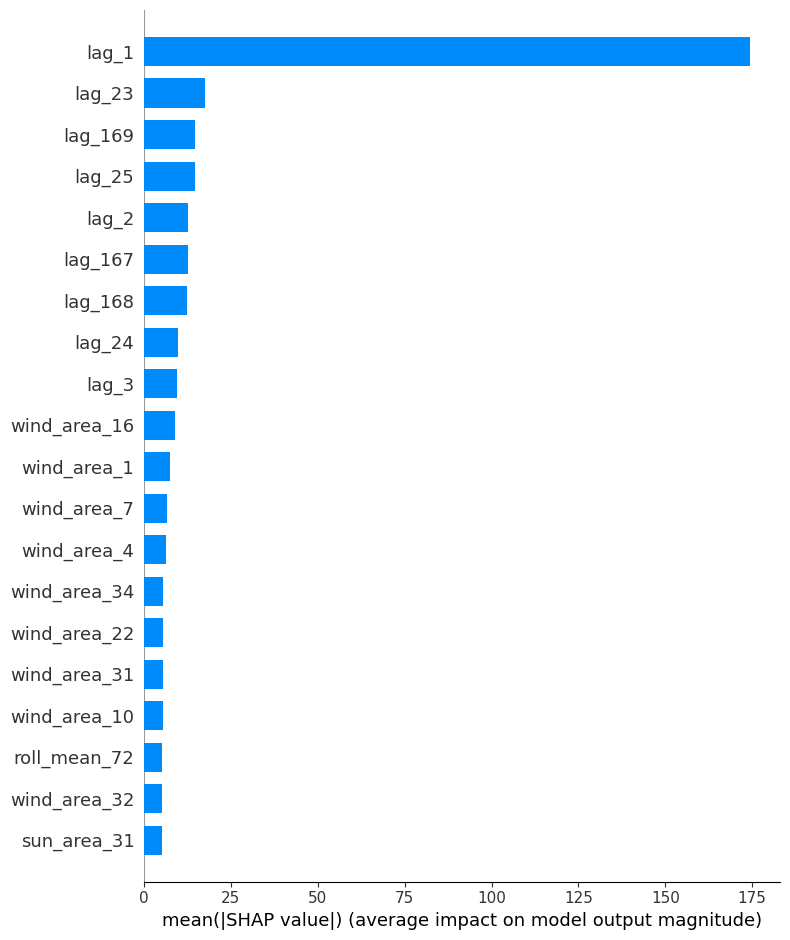

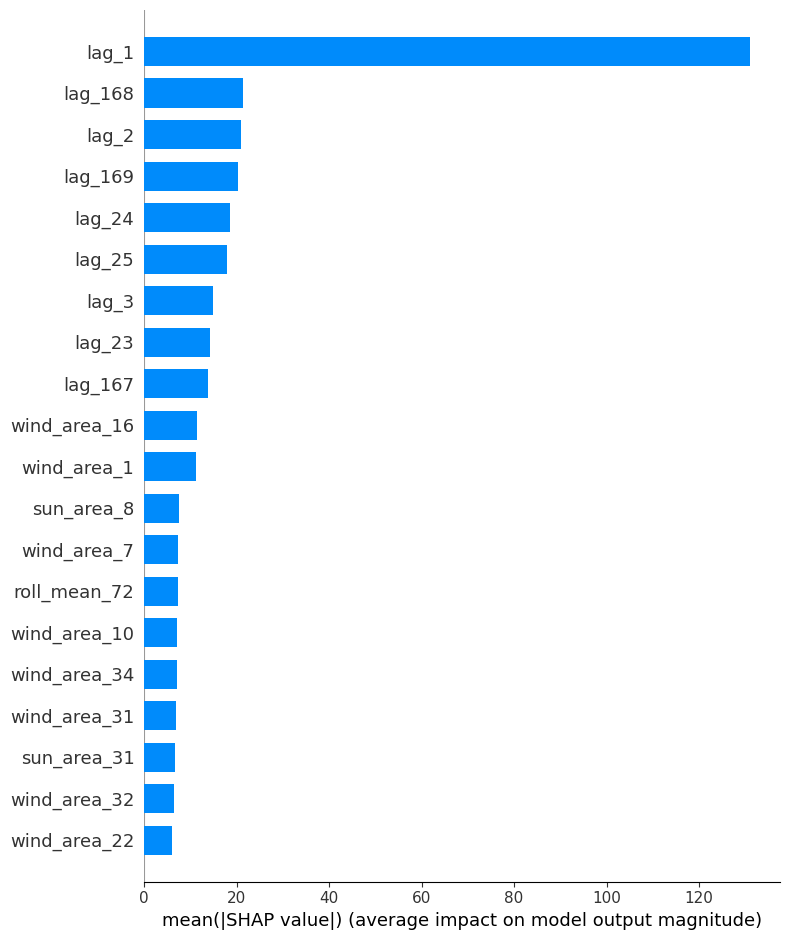

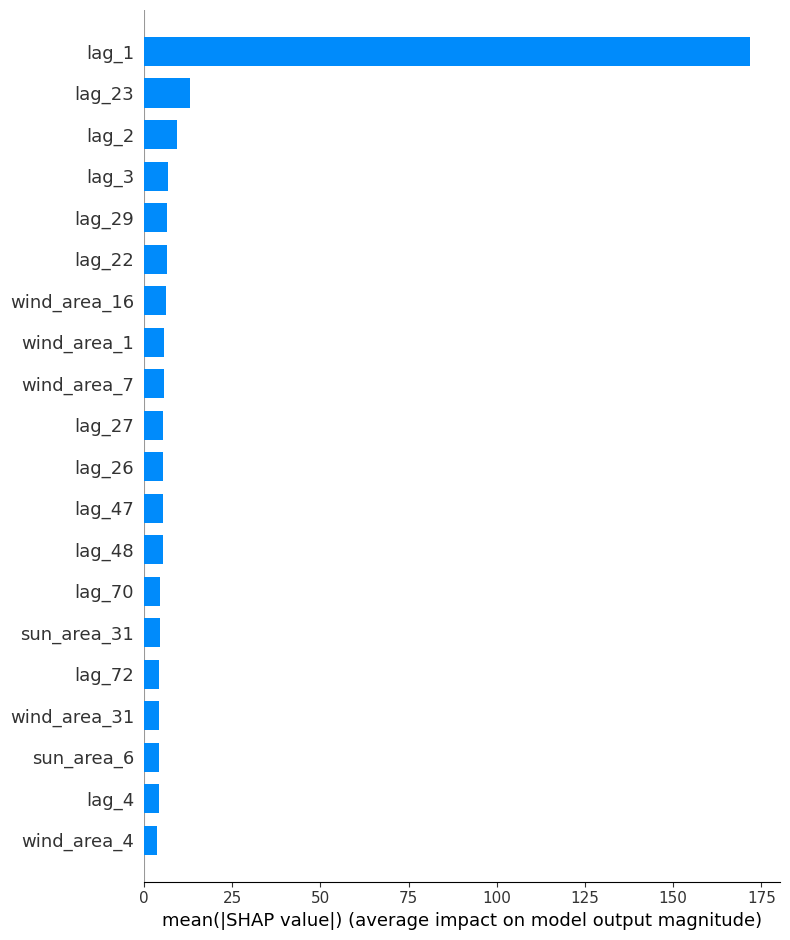

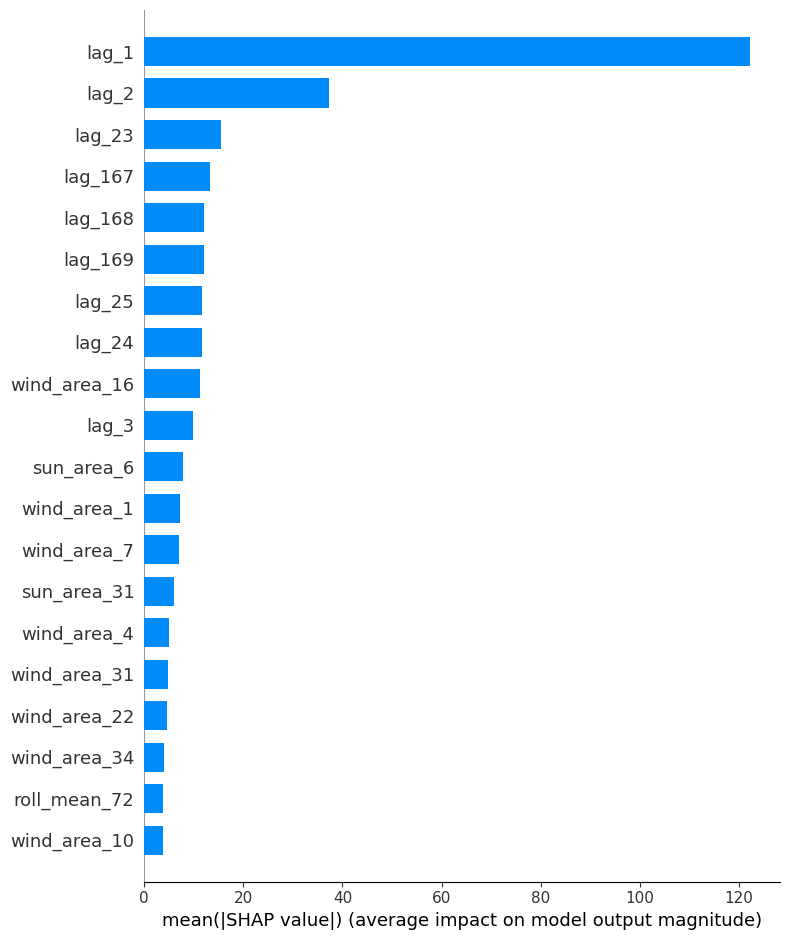

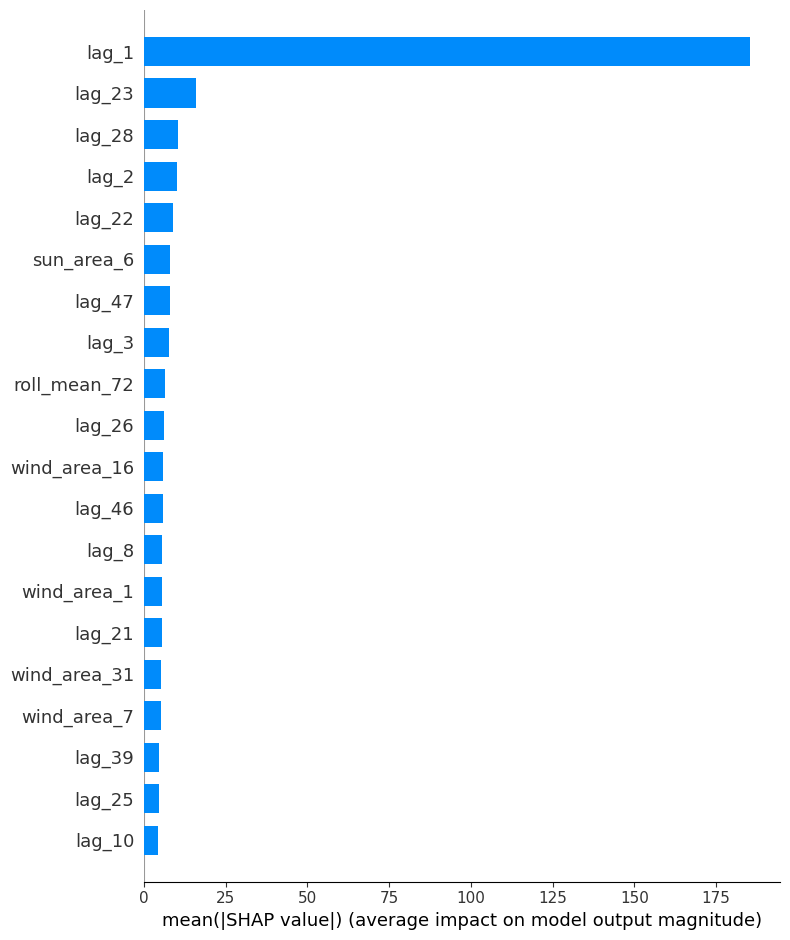

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)

In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pca_kmeans_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_3_results_20250506_142027.csv


# Experiment 4
Pearson reduction

In [ ]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [6]:
data = Dataretreiver(reduce='pearson', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pearson_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top 13 most correlated with elspot price:
sun_area_6: correlation = -0.2910
sun_area_11: correlation = -0.2882
sun_area_1: correlation = -0.2874
sun_area_16: correlation = -0.2839
sun_area_7: correlation = -0.2830
sun_area_2: correlation = -0.2830
sun_area_3: correlation = -0.2828
sun_area_21: correlation = -0.2828
sun_area_8: correlation = -0.2814
sun_area_26: correlation = -0.2802
sun_area_4: correlation = -0.2792
sun_area_12: correlation = -0.2785
sun_area_13: correlation = -0.2783
Top 13 most correlated with elspot price:
wind_area_12: correlation = -0.4016
wind_area_13: correlation = -0.3981
wind_area_17: correlation = -0.3916
wind_area_16: correlation = -0.3907
wind_area_18: correlation = -0.3902
wind_area_27: correlation = -0.3849
wind_area_7: correlation

  0%|          | 0/20 [00:03<?, ?it/s]


[W 2025-05-16 13:13:23,834] Trial 0 failed with parameters: {'n_estimators': 800, 'max_depth': 5, 'min_data_in_leaf': 132, 'learning_rate': 0.28014423685061673, 'feature_fraction': 0.8597344848927815, 'max_bin': 135, 'reg_alpha': 0.9807641983846155, 'reg_lambda': 0.6848297385848633, 'lags': 48} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/skforecast/model_selection/_search.py", line 772, in _objective
    metrics, _ = backtesting_forecaster(
                 ~~~~~~~~~~~~~~~~~~~~~~^
                     forecaster    = forecaster,
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<6 lines>...
                     show_progress = False
                     ^^^^^^^^^^^^^^^^^^^^^
                 )
                 

KeyboardInterrupt: 

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  177.4736 ± 31.3329  159.9787 ± 40.5705   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  224.2323 ± 39.4980  200.3210 ± 47.5422   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  


In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pearson_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_4_results_20250506_144248.csv


In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)